In [1]:
import pandas as pd    
import matplotlib.pyplot as plt  # Pour créer des graphiques

# Configuration pour de jolis graphiques
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['axes.grid'] = True  

In [2]:
#  charger le csv

df = pd.read_csv("data.csv")

print("✅ Fichier chargé avec succès !")
print(f"🎌 Nombre d'animés : {len(df)}")

# afficher les 5 première ligne 

print(df.head())

✅ Fichier chargé avec succès !
🎌 Nombre d'animés : 73
                              Anime           Genre_Tags    Source  \
0                            Naruto      Action / Shonen     Manga   
1                            Trigun      Sci-Fi / Action     Manga   
2                     Dragon Ball Z      Action / Shonen     Manga   
3  Fullmetal Alchemist: Brotherhood  Aventure / Military     Manga   
4                      Cowboy Bebop        Sci-Fi / Noir  Original   

   Nb_Episodes Status          Studio    Date_Pub  Note_Globale  \
0          220   Fini  Studio Pierrot  2002-10-03           8.4   
1           26   Fini        Madhouse  1998-04-01           8.2   
2          291   Fini  Toei Animation  1989-04-26           8.7   
3           64   Fini           Bones  2009-04-05           9.1   
4           26   Fini         Sunrise  1998-04-03           8.8   

   Note_Meilleur_Ep                   Meilleur_Ep_Titre  \
0               9.6           Ep 133: Le cri des larmes   
1   

In [24]:
# la taille

lignes, colonnes = df.shape

print(f"📊 Notre tableau contient :")
print(f"   ➜ {lignes} lignes (= {lignes} animés)")
print(f"   ➜ {colonnes} colonnes (= types d'informations)")

# nombre de colonne 
print("📋 Colonnes disponibles :")
print("-" * 40)

for i, col in enumerate(df.columns, 1):
    print(f"  {i}. {col}")
    

📊 Notre tableau contient :
   ➜ 73 lignes (= 73 animés)
   ➜ 17 colonnes (= types d'informations)
📋 Colonnes disponibles :
----------------------------------------
  1. Anime
  2. Genre_Tags
  3. Source
  4. Nb_Episodes
  5. Status
  6. Studio
  7. Date_Pub
  8. Note_Globale
  9. Note_Meilleur_Ep
  10. Meilleur_Ep_Titre
  11. Comm_Meilleur_Ep
  12. Note_Pire_Ep
  13. Pire_Ep_Titre
  14. Comm_Pire_Ep
  15. Comm_Saison_1
  16. Comm_Saison_2
  17. Comm_Saison_3


In [25]:
# Statistiques des colonnes numériques
print(df.describe().round(2))

# Sélectionner les colonnes importantes pour l'analyse 
colonnes = ['Anime', 'Note_Globale', 'Studio',]
selection = df[colonnes]

print("🎯 Sélection de 3 colonnes :")
selection.head(10)

       Nb_Episodes  Note_Globale  Note_Meilleur_Ep  Note_Pire_Ep
count        73.00         73.00             73.00         73.00
mean         80.86          8.30              9.31          6.75
std         149.95          0.51              0.45          1.32
min           3.00          6.00              8.20          0.00
25%          24.00          8.10              9.10          6.30
50%          32.00          8.40              9.40          7.20
75%          74.00          8.60              9.70          7.50
max        1090.00          9.30              9.90          8.40
🎯 Sélection de 3 colonnes :


,Anime,Note_Globale,Studio
0,Naruto,8.4,Studio Pierrot
1,Trigun,8.2,Madhouse
2,Dragon Ball Z,8.7,Toei Animation
3,Fullmetal Alchemist: Brotherhood,9.1,Bones
4,Cowboy Bebop,8.8,Sunrise
5,Sword Art Online,7.2,A-1 Pictures
6,Re:Zero,8.2,White Fox
7,Dr. Stone,8.3,TMS Entertainment
8,One Piece,8.7,Toei Animation
9,Blue Lock,8.2,8bit


In [26]:
# Mettre les noms d'animés en majuscules
noms_majuscules = df['Anime'].str.upper()

print("🔤 Noms en majuscules :")
print(noms_majuscules.head(10).to_string())

# Extraire le genre principal (avant le "/")
df['Genre_Principal'] = df['Genre_Tags'].str.split(' / ').str[0]

print("✂️ Genre principal extrait :")
print(df[['Anime', 'Genre_Tags', 'Genre_Principal']].head(10))

🔤 Noms en majuscules :
0                              NARUTO
1                              TRIGUN
2                       DRAGON BALL Z
3    FULLMETAL ALCHEMIST: BROTHERHOOD
4                        COWBOY BEBOP
5                    SWORD ART ONLINE
6                             RE:ZERO
7                           DR. STONE
8                           ONE PIECE
9                           BLUE LOCK
✂️ Genre principal extrait :
                              Anime              Genre_Tags Genre_Principal
0                            Naruto         Action / Shonen          Action
1                            Trigun         Sci-Fi / Action          Sci-Fi
2                     Dragon Ball Z         Action / Shonen          Action
3  Fullmetal Alchemist: Brotherhood     Aventure / Military        Aventure
4                      Cowboy Bebop           Sci-Fi / Noir          Sci-Fi
5                  Sword Art Online        Isekai / Romance          Isekai
6                           Re:Zero 

In [27]:
# Convertir la colonne Date_Pub en format date
df['Date_Pub'] = pd.to_datetime(df['Date_Pub'])

# Extraire l'année de publication
df['Annee'] = df['Date_Pub'].dt.year

print("📅 Dates converties et année extraite :")
print(df[['Anime', 'Date_Pub', 'Annee']].head(10)) 

# Trier par Note_Globale (du plus haut au plus bas)
df_trie = df.sort_values('Note_Globale', ascending=False)

print("🏆 Top 10 des animés par note :")
print(df_trie[['Anime', 'Note_Globale', 'Studio']].head(10).to_string(index=False))

📅 Dates converties et année extraite :
                              Anime   Date_Pub  Annee
0                            Naruto 2002-10-03   2002
1                            Trigun 1998-04-01   1998
2                     Dragon Ball Z 1989-04-26   1989
3  Fullmetal Alchemist: Brotherhood 2009-04-05   2009
4                      Cowboy Bebop 1998-04-03   1998
5                  Sword Art Online 2012-07-08   2012
6                           Re:Zero 2016-04-04   2016
7                         Dr. Stone 2019-07-05   2019
8                         One Piece 1999-10-20   1999
9                         Blue Lock 2022-10-09   2022
🏆 Top 10 des animés par note :
                           Anime  Note_Globale             Studio
   Frieren: Beyond Journey's End           9.3           Madhouse
                     Steins;Gate           9.1          White Fox
Fullmetal Alchemist: Brotherhood           9.1              Bones
          Hunter x Hunter (2011)           9.0           Madhouse
      

In [ ]:
# Filtrer les animés avec une note supérieure à 8.7
excellents = df[df['Note_Globale'] > 8.7 ]

print(f"🌟 {len(excellents)} animés ont une note > 8.7 :")
print(excellents[['Anime', 'Note_Globale']].to_string(index=False))

# Animés avec note > 8.5 ET qui sont terminés
condition1 = df['Note_Globale'] > 8.5
condition2 = df['Status'] == 'Fini'

bons_finis = df[condition1 & condition2]

print(f"✅ {len(bons_finis)} animés avec note > 8.5 ET terminés :")
print(bons_finis[['Anime', 'Note_Globale', 'Status']].head(10).to_string(index=False))

🌟 9 animés ont une note > 8.7 :
                           Anime  Note_Globale
Fullmetal Alchemist: Brotherhood           9.1
                    Cowboy Bebop           8.8
    Les Carnets de l'apothicaire           8.8
          Hunter x Hunter (2011)           9.0
                     Steins;Gate           9.1
   Frieren: Beyond Journey's End           9.3
                         Monster           8.9
                  Hajime no Ippo           8.8
                    Vinland Saga           8.8
✅ 15 animés avec note > 8.5 ET terminés :
                           Anime  Note_Globale Status
                   Dragon Ball Z           8.7   Fini
Fullmetal Alchemist: Brotherhood           9.1   Fini
                    Cowboy Bebop           8.8   Fini
                       Haikyuu!!           8.7   Fini
                      Death Note           8.6   Fini
          Hunter x Hunter (2011)           9.0   Fini
                      Code Geass           8.7   Fini
                     Ste

In [15]:
# Moyenne des notes
note_moyenne = df['Note_Globale'].mean()

print(f"📊 Note moyenne des animés : {note_moyenne:.2f} / 10")

# Moyenne du nombre d'épisodes
episodes_moyen = df['Nb_Episodes'].mean()
print(f"📺 Nombre moyen d'épisodes : {episodes_moyen:.0f}")

# Note la plus haute et la plus basse
note_max = df['Note_Globale'].max()
note_min = df['Note_Globale'].min()

print(f"⭐ Note la plus haute : {note_max}")
print(f"📉 Note la plus basse : {note_min}")

📊 Note moyenne des animés : 8.30 / 10
📺 Nombre moyen d'épisodes : 81
⭐ Note la plus haute : 9.3
📉 Note la plus basse : 6.0


In [16]:
# Quel animé a la meilleure note ?
meilleur = df[df['Note_Globale'] == note_max]['Anime'].values[0]
print(f"\n🏆 Le mieux noté : {meilleur}")

# Compter les animés par statut
print("📊 Répartition par statut :")
print(df['Status'].value_counts())

print("\n" + "="*40 + "\n")

# Top 5 des studios avec le plus d'animés
print("🏢 Top 5 des studios :")
print(df['Studio'].value_counts().head(5))


🏆 Le mieux noté : Frieren: Beyond Journey's End
📊 Répartition par statut :
Status
Fini        46
En cours    24
En pause     3
Name: count, dtype: int64


🏢 Top 5 des studios :
Studio
Madhouse          13
Studio Pierrot     8
A-1 Pictures       6
Bones              5
White Fox          3
Name: count, dtype: int64


C:\Users\HP\AppData\Roaming\Python\Python314\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


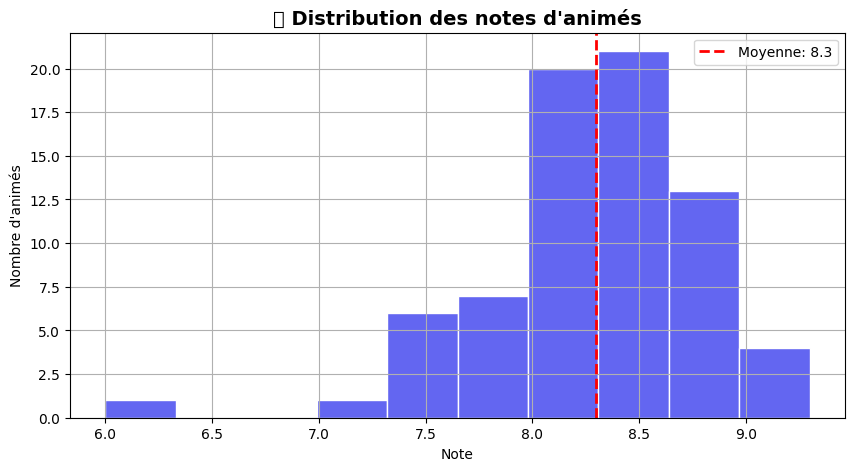

💡 La ligne rouge montre la moyenne !


In [17]:
# Histogramme des notes
plt.figure(figsize=(10, 5))

plt.hist(df['Note_Globale'], bins=10, color='#6366f1', edgecolor='white')

# Ajouter la moyenne
moyenne = df['Note_Globale'].mean()
plt.axvline(moyenne, color='red', linestyle='--', linewidth=2, label=f'Moyenne: {moyenne:.1f}')

plt.title("📊 Distribution des notes d'animés", fontsize=14, fontweight='bold')
plt.xlabel("Note")
plt.ylabel("Nombre d'animés")
plt.legend()
plt.show()

print("💡 La ligne rouge montre la moyenne !")

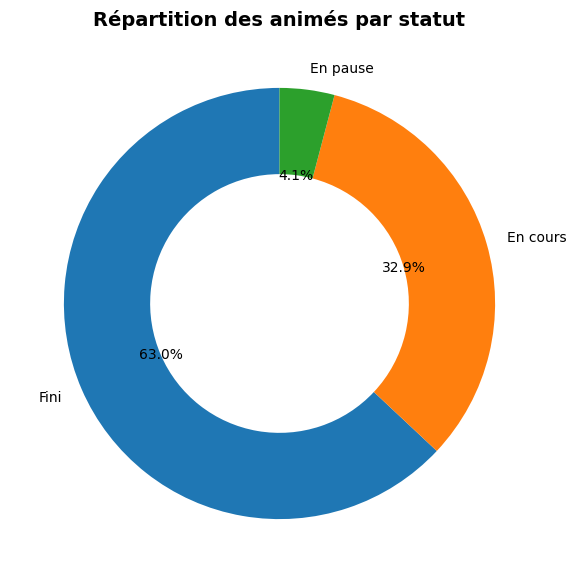

In [23]:

# Compter les animés par statut
statuts = df["Status"].value_counts()

# Graphique donut
plt.figure(figsize=(7, 7))

plt.pie(
    statuts.values,
    labels=statuts.index,
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops={'width': 0.4}
)

plt.title("Répartition des animés par statut", fontsize=14, fontweight="bold")
plt.show()

C:\Users\HP\AppData\Roaming\Python\Python314\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


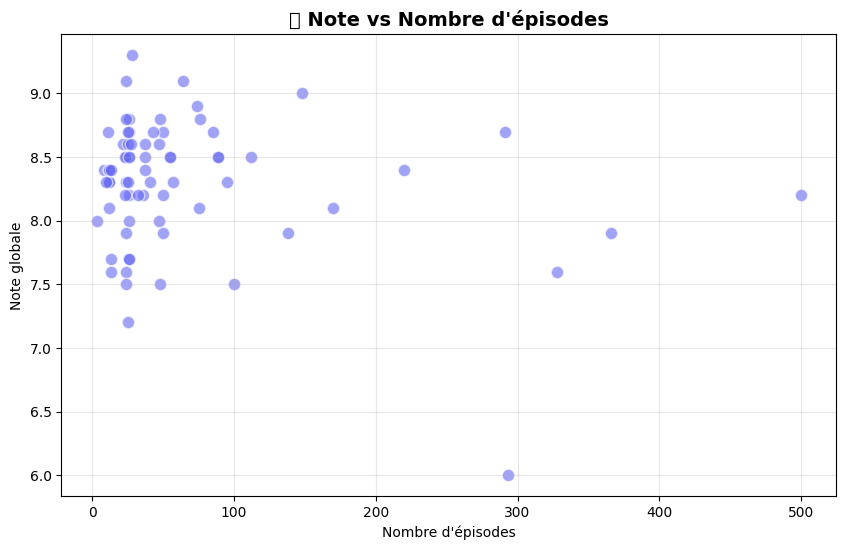

💡 Chaque point = un animé


In [19]:
# Nuage de points
plt.figure(figsize=(10, 6))

# Limiter à 500 épisodes max pour mieux voir
df_filtre = df[df['Nb_Episodes'] <= 500]

plt.scatter(df_filtre['Nb_Episodes'], df_filtre['Note_Globale'], 
           alpha=0.6, c='#6366f1', s=80, edgecolor='white')

plt.title("📈 Note vs Nombre d'épisodes", fontsize=14, fontweight='bold')
plt.xlabel("Nombre d'épisodes")
plt.ylabel("Note globale")
plt.grid(True, alpha=0.3)
plt.show()

print("💡 Chaque point = un animé")

In [20]:
# Corrélation entre Note Globale et Note du Meilleur Épisode
corr = df['Note_Globale'].corr(df['Note_Meilleur_Ep'])

print(f"🔗 Corrélation Note Globale vs Note Meilleur Ep : {corr:.2f}")

# Interprétation
if corr > 0.5:
    print("\n📈 Corrélation POSITIVE forte !")
    print("   → Un bon épisode = souvent un bon animé")
elif corr > 0:
    print("\n📈 Corrélation POSITIVE faible")
else:
    print("\n📉 Corrélation NÉGATIVE")

🔗 Corrélation Note Globale vs Note Meilleur Ep : 0.32

📈 Corrélation POSITIVE faible


In [18]:
# Corrélation Note Globale vs Note du Pire Épisode
corr_pire = df['Note_Globale'].corr(df['Note_Pire_Ep'])

print(f"🔗 Corrélation Note Globale vs Note Pire Ep : {corr_pire:.2f}")

# Comparaison
print(f"\n📊 Récapitulatif :")
print(f"   • Note Meilleur Ep : forte corrélation positive")
print(f"   • Note Pire Ep    : corrélation plus faible")
print(f"\n💡 Un animé peut avoir un mauvais épisode et rester bien noté !")

🔗 Corrélation Note Globale vs Note Pire Ep : 0.35

📊 Récapitulatif :
   • Note Meilleur Ep : forte corrélation positive
   • Note Pire Ep    : corrélation plus faible

💡 Un animé peut avoir un mauvais épisode et rester bien noté !


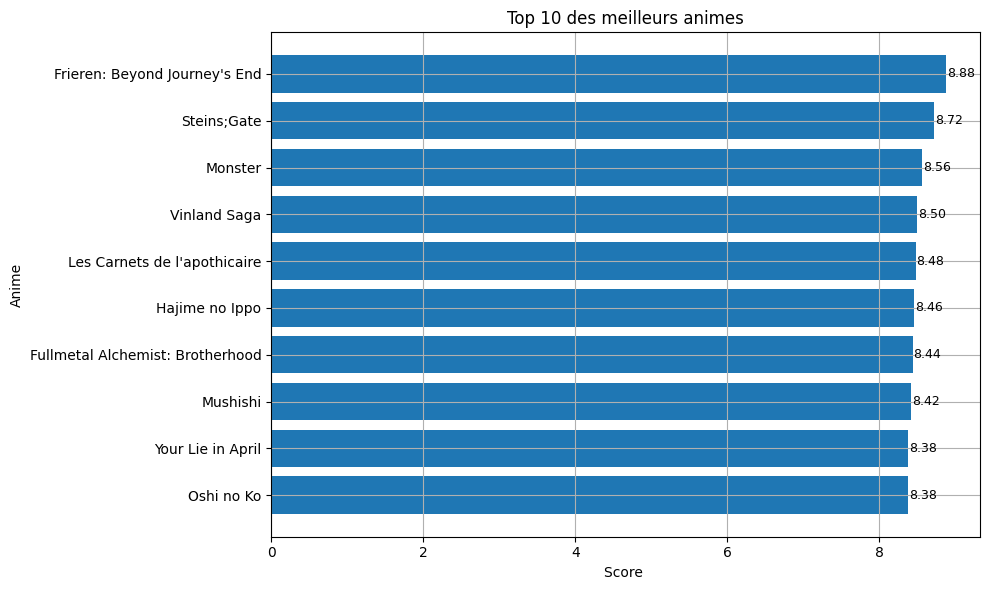

In [19]:
# Indicateurs de qualité
# -----------------------------

# Régularité de l'anime
df["Stabilite"] = df["Note_Meilleur_Ep"] - df["Note_Pire_Ep"]

# Score éditorial (plus il est élevé, meilleur est l’anime)
df["Score_Editorial"] = df["Note_Globale"] - (df["Stabilite"] * 0.2)

# Top 10 des meilleurs animes
top = df.sort_values("Score_Editorial", ascending=False).head(10)

# Inverser pour affichage (meilleur en haut)
top = top[::-1]

# -----------------------------
# Graphique
# -----------------------------

plt.figure(figsize=(10, 6))

bars = plt.barh(
    top["Anime"],
    top["Score_Editorial"]
)

# Ajouter la valeur sur chaque barre
for bar in bars:
    width = bar.get_width()
    plt.text(
        width + 0.01,
        bar.get_y() + bar.get_height() / 2,
        f"{width:.2f}",
        va="center",
        fontsize=9
    )

plt.title("Top 10 des meilleurs animes")
plt.xlabel("Score ")
plt.ylabel("Anime")

plt.tight_layout()
plt.show()

In [21]:
print("💾 ÉTAPE 11 — Sauvegarde du fichier")
df.to_csv("animes_clean.csv", index=False)
print("✅ Fichier sauvegardé : animes_clean.csv")

💾 ÉTAPE 11 — Sauvegarde du fichier
✅ Fichier sauvegardé : animes_clean.csv
